<h1>Importación de Librerías<h1>


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h2>Nintendo Switch<h2>

In [2]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Nintendo Switch&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_nintendoswitch = df.price.median()
amount_median_nintendoswitch = df.amount.median()
rate_median_nintendoswitch = df.rate.median()

<h2>Play Station 5<h2>

In [3]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Play Station 5&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_playstation5 = df.price.median()
amount_median_playstation5 = df.amount.median()
rate_median_playstation5 = df.rate.median()

<h2>Xbox One S<h2>

In [4]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Xbox One S&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_xboxones = df.price.median()
amount_median_xboxones = df.amount.median()
rate_median_xboxones = df.rate.median()

In [5]:
serie_class = pd.Series(['Nintendo Switch','Play Station 5','Xbox One S'])
serie_price_median = pd.Series([price_median_nintendoswitch,price_median_xboxones,price_median_playstation5])
serie_amount_median = pd.Series([amount_median_nintendoswitch,amount_median_xboxones,amount_median_playstation5])
serie_rate_median = pd.Series([rate_median_nintendoswitch,rate_median_xboxones,rate_median_playstation5])

In [6]:
df_price = pd.DataFrame({'products':serie_class,'values':serie_price_median})
df_price['type'] = 'price'
df_price

,products,values,type
0,Nintendo Switch,539999.5,price
1,Play Station 5,432500.0,price
2,Xbox One S,1199999.5,price


In [7]:
df_amount = pd.DataFrame({'products':serie_class,'values':serie_amount_median})
df_amount['type'] = 'amount'
df_amount

,products,values,type
0,Nintendo Switch,105249.155,amount
1,Play Station 5,84645.000,amount
2,Xbox One S,227525.325,amount


Comparativa consolas

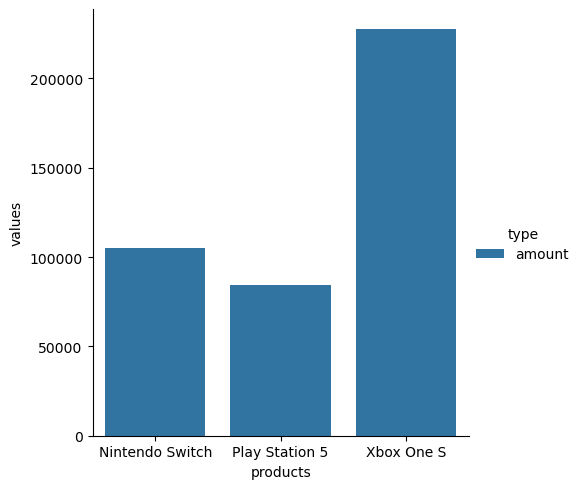

In [8]:
sns.catplot(x='products', y='values', hue='type', data=df_amount, kind='bar')

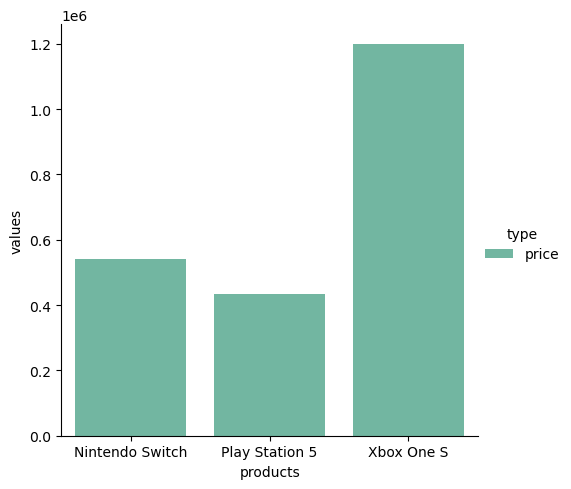

In [9]:
sns.catplot(x='products', y='values', hue='type', data=df_price, kind='bar', palette='Set2')


2


In [15]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Nintendo Switch&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount']) 
df['rate'] = df.installments.map(lambda x: x['rate'])

In [16]:
for indx, i in enumerate(df['id']):
    print(indx)
    if indx==0:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df['id'] = json_get['id']
        df['title'] = json_get['title']
        df['condition'] = json_get['condition']
        df['thumbnail_id'] = json_get['thumbnail_id']
        df['catalog_product_id'] = json_get['catalog_product_id']
        df['listing_type_id'] = json_get['listing_type_id']
        df['permalink'] = json_get['permalink']
        df['buying_mode'] = json_get['buying_mode']
        
        
     
    else:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df_aux = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
     
        df = pd.concat([df,df_aux],axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [33]:
import csv
import requests

# Realizar la solicitud GET para obtener el JSON de Nintendo Switch
response_switch = requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Nintendo%20Switch&limit=50")
data_switch = response_switch.json()

# Realizar la solicitud GET para obtener el JSON de PlayStation 5
response_ps5 = requests.get("https://api.mercadolibre.com/sites/MLA/search?q=PlayStation%205&limit=50")
data_ps5 = response_ps5.json()

# Realizar la solicitud GET para obtener el JSON de Xbox One S
response_xbox = requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Xbox%20One%20S&limit=50")
data_xbox = response_xbox.json()

# Verificar si la solicitud de Nintendo Switch fue exitosa
if response_switch.status_code == 200:
    fields = ['id', 'title', 'price','thumbnail_id','catalog_product_id','listing_type_id','permalink','buying_mode']
    with open('resultados_nintendo_switch.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)
        writer.writeheader()
        for item in data_switch['results']:
            row = {}
            row['id'] = item['id']
            row['title'] = item['title']
            row['price'] = item['price']
            row['thumbnail_id'] = item['thumbnail_id']
            row['catalog_product_id'] = item['catalog_product_id']
            row['listing_type_id'] = item['listing_type_id']
            row['permalink'] = item['permalink']
            row['buying_mode'] = item['buying_mode']
            writer.writerow(row)
    print("Los datos de Nintendo Switch se han escrito correctamente en el archivo 'resultados_nintendo_switch.csv'.")
else:
    print("Error al realizar la solicitud GET de Nintendo Switch:", response_switch.status_code)

# Verificar si la solicitud de PlayStation 5 fue exitosa
if response_ps5.status_code == 200:
    fields = ['id', 'title', 'price','thumbnail_id','catalog_product_id','listing_type_id','permalink','buying_mode']
    with open('resultados_playstation_5.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)
        writer.writeheader()
        for item in data_ps5['results']:
            row = {}
            row['id'] = item['id']
            row['title'] = item['title']
            row['price'] = item['price']
            row['thumbnail_id'] = item['thumbnail_id']
            row['catalog_product_id'] = item['catalog_product_id']
            row['listing_type_id'] = item['listing_type_id']
            row['permalink'] = item['permalink']
            row['buying_mode'] = item['buying_mode']
            writer.writerow(row)
    print("Los datos de PlayStation 5 se han escrito correctamente en el archivo 'resultados_playstation_5.csv'.")
else:
    print("Error al realizar la solicitud GET de PlayStation 5:", response_ps5.status_code)

# Verificar si la solicitud de Xbox One S fue exitosa
if response_xbox.status_code == 200:
    fields = ['id', 'title', 'price','thumbnail_id','catalog_product_id','listing_type_id','permalink','buying_mode']
    with open('resultados_xbox_one_s.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)
        writer.writeheader()
        for item in data_xbox['results']:
            row = {}
            row['id'] = item['id']
            row['title'] = item['title']
            row['price'] = item['price']
            row['thumbnail_id'] = item['thumbnail_id']
            row['catalog_product_id'] = item['catalog_product_id']
            row['listing_type_id'] = item['listing_type_id']
            row['permalink'] = item['permalink']
            row['buying_mode'] = item['buying_mode']
            writer.writerow(row)
    print("Los datos de Xbox One S se han escrito correctamente en el archivo 'resultados_xbox_one_s.csv'.")
else:
    print("Error al realizar la solicitud GET de Xbox One S:", response_xbox.status_code)

Los datos de Nintendo Switch se han escrito correctamente en el archivo 'resultados_nintendo_switch.csv'.
Los datos de PlayStation 5 se han escrito correctamente en el archivo 'resultados_playstation_5.csv'.
Los datos de Xbox One S se han escrito correctamente en el archivo 'resultados_xbox_one_s.csv'.
